In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Load and investigate the data

In [212]:
df = pd.read_csv('tennis_stats.csv')

df = pd.read_csv('tennis_stats.csv')

df.head()

predictions = []

In [213]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [214]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


## Exploratory Analysis

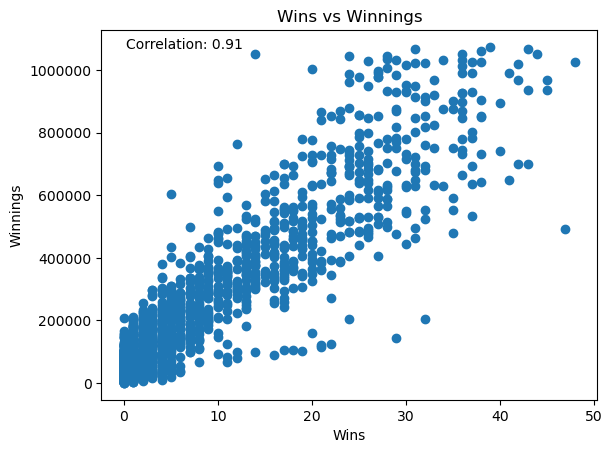

<Figure size 640x480 with 0 Axes>

In [215]:
correlation = df['Wins'].corr(df['Winnings'])

plt.scatter(df['Wins'], df['Winnings'])
plt.title('Wins vs Winnings')
plt.xlabel('Wins')
plt.ylabel('Winnings')
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.ticklabel_format(style='plain')  # Remove scientific notation
plt.show()
plt.clf()

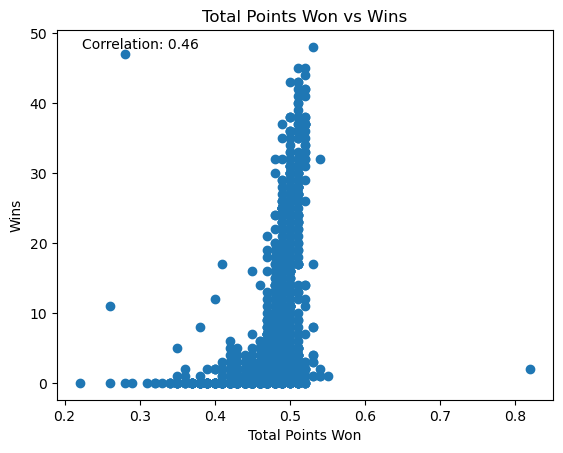

<Figure size 640x480 with 0 Axes>

In [216]:
# Calculate correlation
correlation = df['TotalPointsWon'].corr(df['Wins'])

# Create scatter plot
plt.scatter(df['TotalPointsWon'], df['Wins'])
plt.title('Total Points Won vs Wins')
plt.xlabel('Total Points Won')
plt.ylabel('Wins')

# Add correlation to the graph
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)

plt.show()
plt.clf()

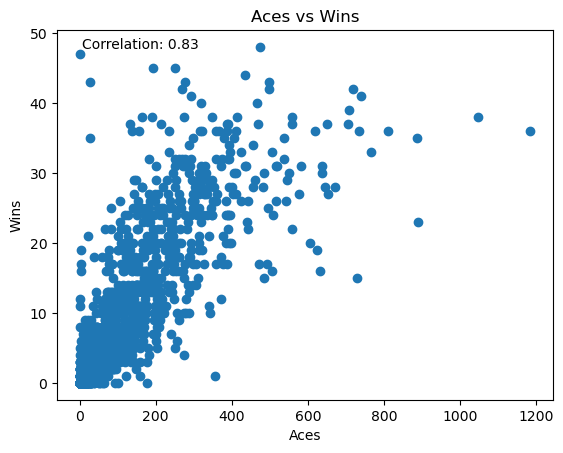

<Figure size 640x480 with 0 Axes>

In [217]:
correlation = df['Aces'].corr(df['Wins'])

plt.scatter(df['Aces'], df['Wins'])
plt.title('Aces vs Wins')
plt.xlabel('Aces')
plt.ylabel('Wins')
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()
plt.clf()

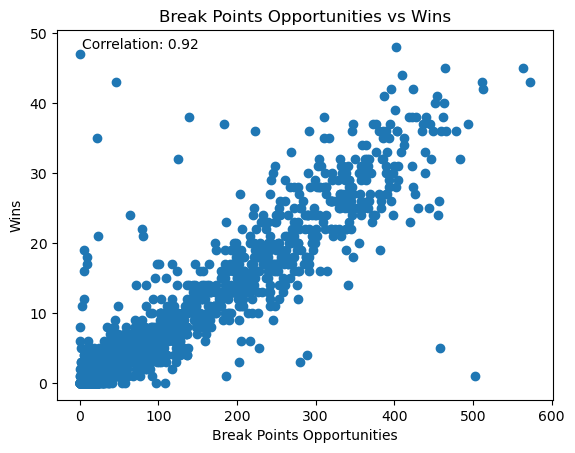

<Figure size 640x480 with 0 Axes>

In [218]:
correlation = df['BreakPointsOpportunities'].corr(df['Wins'])

plt.scatter(df['BreakPointsOpportunities'], df['Wins'])
plt.title('Break Points Opportunities vs Wins')
plt.xlabel('Break Points Opportunities')
plt.ylabel('Wins')
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()
plt.clf()

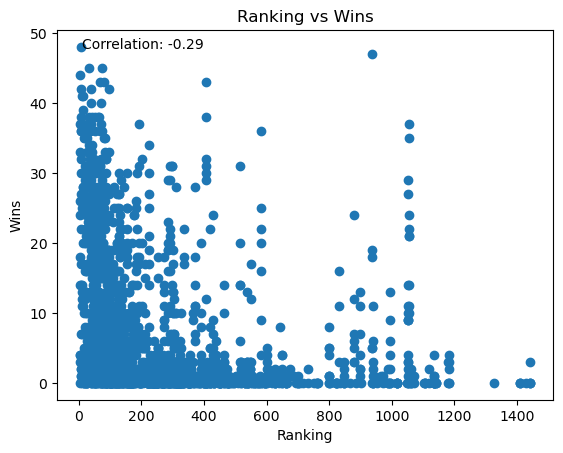

<Figure size 640x480 with 0 Axes>

In [219]:
correlation = df['Ranking'].corr(df['Wins'])

plt.scatter(df['Ranking'], df['Wins'])
plt.title('Ranking vs Wins')
plt.xlabel('Ranking')
plt.ylabel('Wins')
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()
plt.clf()

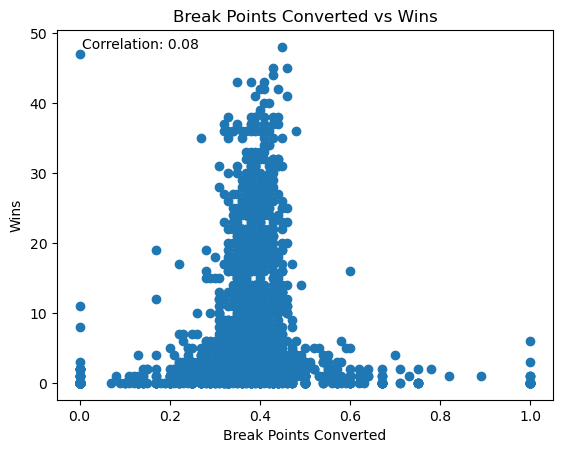

<Figure size 640x480 with 0 Axes>

In [220]:
correlation = df['BreakPointsConverted'].corr(df['Wins'])

plt.scatter(df['BreakPointsConverted'], df['Wins'])
plt.title('Break Points Converted vs Wins')
plt.xlabel('Break Points Converted')
plt.ylabel('Wins')
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()
plt.clf()

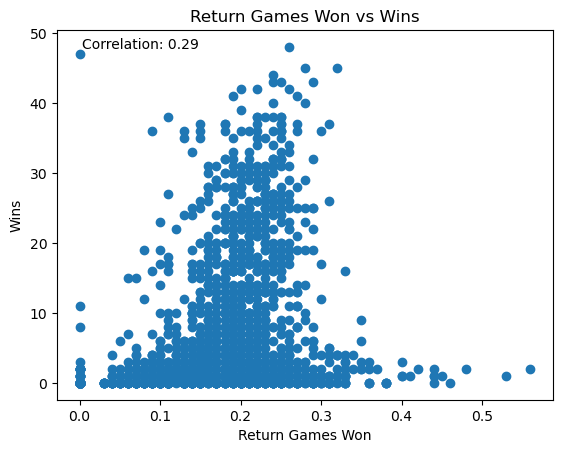

<Figure size 640x480 with 0 Axes>

In [221]:
correlation = df['ReturnGamesWon'].corr(df['Wins'])

plt.scatter(df['ReturnGamesWon'], df['Wins'])
plt.title('Return Games Won vs Wins')
plt.xlabel('Return Games Won')
plt.ylabel('Wins')
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()
plt.clf()

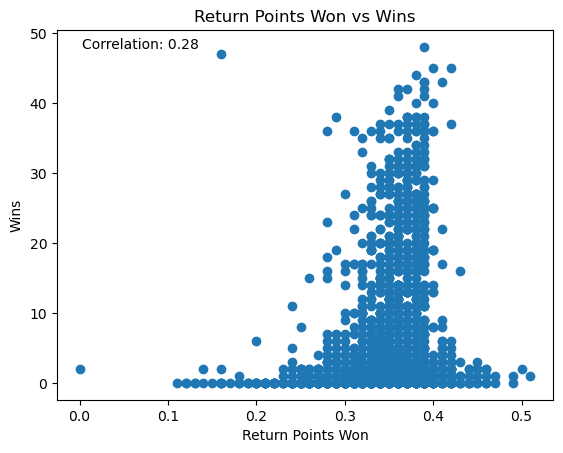

<Figure size 640x480 with 0 Axes>

In [222]:
correlation = df['ReturnPointsWon'].corr(df['Wins'])

plt.scatter(df['ReturnPointsWon'], df['Wins'])
plt.title('Return Points Won vs Wins')
plt.xlabel('Return Points Won')
plt.ylabel('Wins')
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()
plt.clf()

## Single Feature Linear Regression

### Winnings by Wins

In [223]:
feature = df[['Wins']]
target = df['Winnings']

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, train_size=0.8)

model = LinearRegression()
model.fit(feature_train, target_train)

"The models score is: ", model.score(feature_test, target_test)

('The models score is: ', 0.8519231291258371)

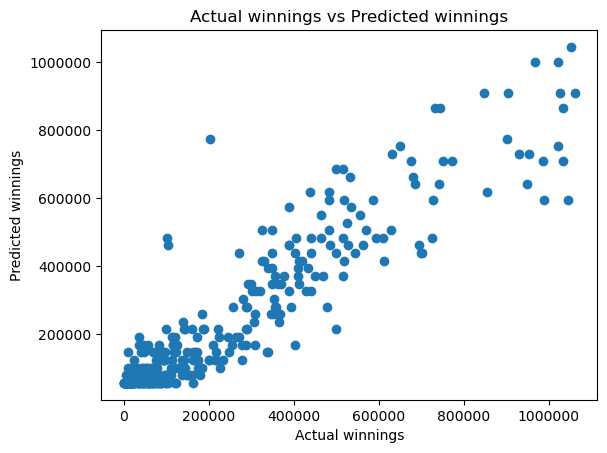

In [224]:
target_predict = model.predict(feature_test)

plt.scatter(target_test, target_predict)
plt.xlabel('Actual winnings')
plt.ylabel('Predicted winnings')
plt.title('Actual winnings vs Predicted winnings')
plt.ticklabel_format(style='plain')  # Remove scientific notation
plt.show()


In [225]:
feature_test = pd.DataFrame([[50]], columns=['Wins']) # Predict the winnings for a player with 50 wins
predicted_winnings = model.predict(feature_test)
"Predicted winnings for a player with 50 wins: ", predicted_winnings[0]

('Predicted winnings for a player with 50 wins: ', 1178387.5690294297)

### Wins by Aces

In [226]:
feature = df[['Aces']]
target = df['Wins']

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, train_size=0.8)

model = LinearRegression()
model.fit(feature_train, target_train)

"The models score is: ", model.score(feature_test, target_test)

('The models score is: ', 0.6918920678075011)

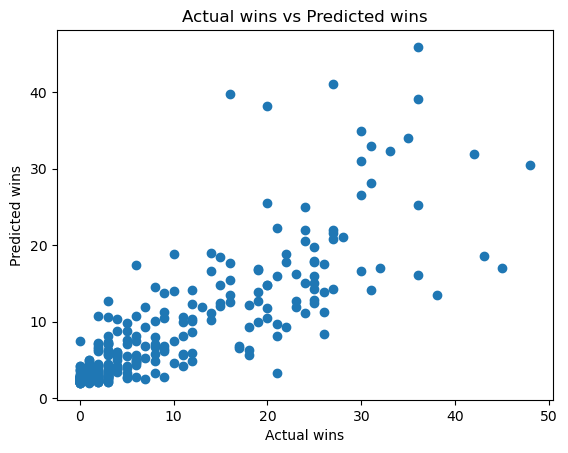

<Figure size 640x480 with 0 Axes>

In [227]:
target_predict = model.predict(feature_test)

plt.scatter(target_test, target_predict)
plt.xlabel('Actual wins')
plt.ylabel('Predicted wins')
plt.title('Actual wins vs Predicted wins')
plt.ticklabel_format(style='plain')  # Remove scientific notation
plt.show()
plt.clf()

In [228]:
feature_test = pd.DataFrame([[850]], columns=['Aces']) # Predicting wins for a player with 850 aces
predicted_wins = model.predict(feature_test)
"Predicted wins for a player with 850 aces: ", predicted_wins[0]

('Predicted wins for a player with 850 aces: ', 52.83361500931237)

### Wins by Break Point Opportunities

In [229]:
feature = df[['BreakPointsOpportunities']]
target = df['Wins']

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, train_size=0.8)

model = LinearRegression()
model.fit(feature_train, target_train)

"The models score is: ", model.score(feature_test, target_test)

('The models score is: ', 0.8947740878803869)

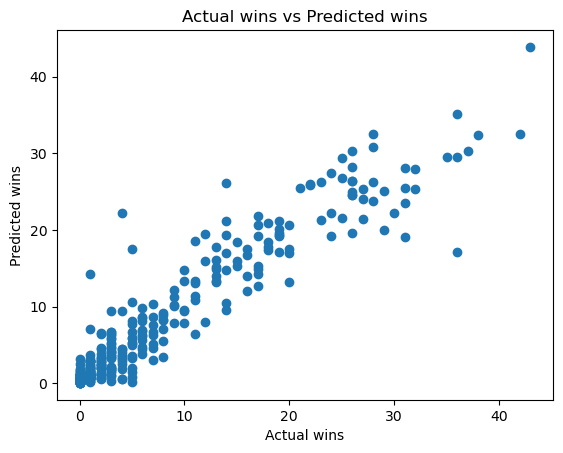

<Figure size 640x480 with 0 Axes>

In [230]:
target_predict = model.predict(feature_test)

plt.scatter(target_test, target_predict)
plt.xlabel('Actual wins')
plt.ylabel('Predicted wins')
plt.title('Actual wins vs Predicted wins')
plt.ticklabel_format(style='plain')  # Remove scientific notation
plt.show()
plt.clf()

In [231]:
feature_test = pd.DataFrame([[400]], columns=['BreakPointsOpportunities']) # Predicted wins for a player with 400 break points opportunities
predicted_wins = model.predict(feature_test)
"Predicted wins for a player with 400 break points opportunities: ", predicted_wins[0]

('Predicted wins for a player with 400 break points opportunities: ',
 30.64753743201797)

## Multiple Feature Linear Regression

In [232]:
features = df[['Wins', 'TotalPointsWon', 'Aces', 'BreakPointsOpportunities', 'Ranking', 'BreakPointsConverted', 'ReturnGamesWon', 'ReturnPointsWon', 'FirstServeReturnPointsWon']]
target = df['Winnings']

features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=0.8)

model = LinearRegression()
model.fit(features_train, target_train)

"The models score is: ", model.score(features_test, target_test)

('The models score is: ', 0.8795470745759586)

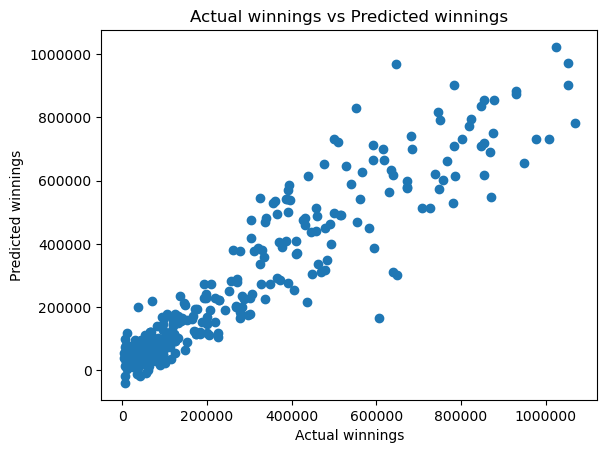

<Figure size 640x480 with 0 Axes>

In [233]:
target_predict = model.predict(features_test)

plt.scatter(target_test, target_predict)
plt.xlabel('Actual winnings')
plt.ylabel('Predicted winnings')
plt.title('Actual winnings vs Predicted winnings')
plt.ticklabel_format(style='plain')  # Remove scientific notation
plt.show()
plt.clf()

In [234]:
features = df[['Wins', 'TotalPointsWon', 'Aces', 'BreakPointsOpportunities', 'Ranking', 'BreakPointsConverted']]
target = df['Winnings']

features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=0.8)

model = LinearRegression()
model.fit(features_train, target_train)

"The models score is: ", model.score(features_test, target_test)

('The models score is: ', 0.8759704982785997)

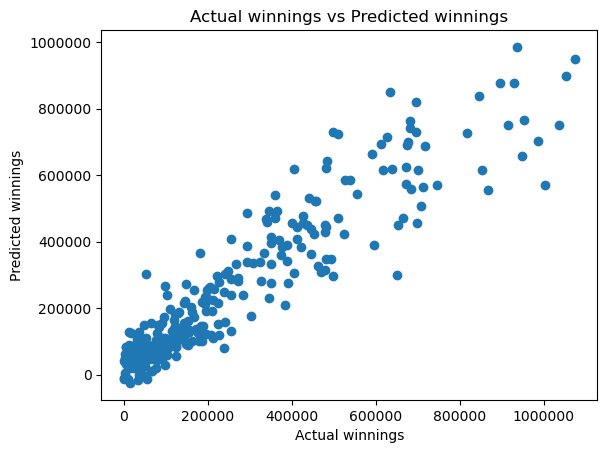

<Figure size 640x480 with 0 Axes>

In [235]:
target_predict = model.predict(features_test)

plt.scatter(target_test, target_predict)
plt.xlabel('Actual winnings')
plt.ylabel('Predicted winnings')
plt.title('Actual winnings vs Predicted winnings')
plt.ticklabel_format(style='plain')  # Remove scientific notation
plt.show()
plt.clf()

In [236]:
features = df[['Wins', 'BreakPointsOpportunities']]
target = df['Winnings']

features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=0.8)

model = LinearRegression()
model.fit(features_train, target_train)

"The models score is: ", model.score(features_test, target_test)

('The models score is: ', 0.8543433529282042)

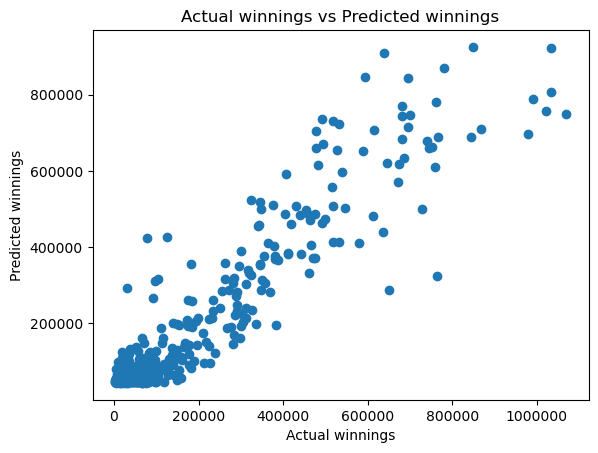

<Figure size 640x480 with 0 Axes>

In [237]:
target_predict = model.predict(features_test)

plt.scatter(target_test, target_predict)
plt.xlabel('Actual winnings')
plt.ylabel('Predicted winnings')
plt.title('Actual winnings vs Predicted winnings')
plt.ticklabel_format(style='plain')  # Remove scientific notation
plt.show()
plt.clf()